In [34]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [35]:
data=pd.read_csv(r'C:\anubhab\time series\AirPassengers.csv')

In [36]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [37]:
print(data.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [38]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [39]:
from datetime import datetime

In [40]:
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month',inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

# STATIONARITY

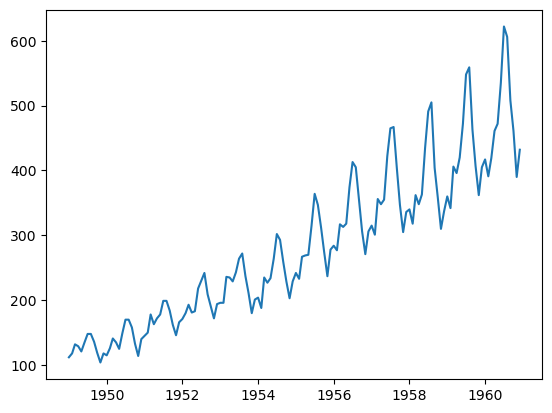

In [41]:
ts=data['#Passengers']
ts.head(10)
plt.plot(ts)

In [42]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determining rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    #pd.rolling_std(timeseries, window=12)
    
#plot rolling statistics:
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red',label='Rolling Mean')
    plt.plot(rolmean, color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #perform dickey-fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest=adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','Number of observation used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]= value 
    print(dfoutput)

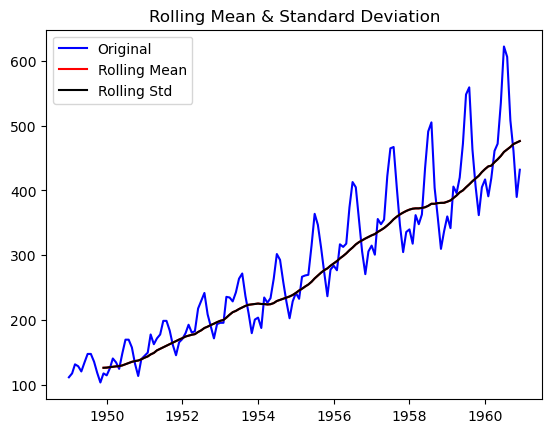

Results of Dickey-Fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#lags used                     13.000000
Number of observation used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [43]:
test_stationarity(ts)

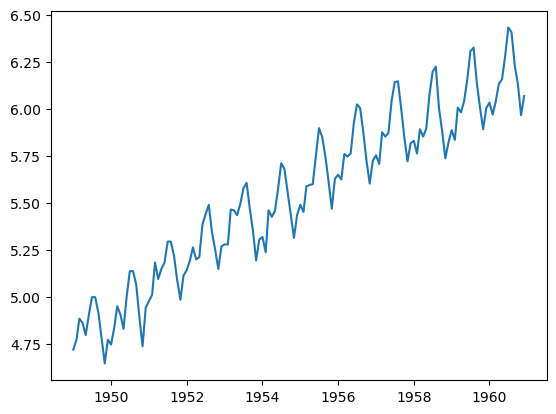

In [44]:
ts_log = np.log(ts)
plt.plot(ts_log)

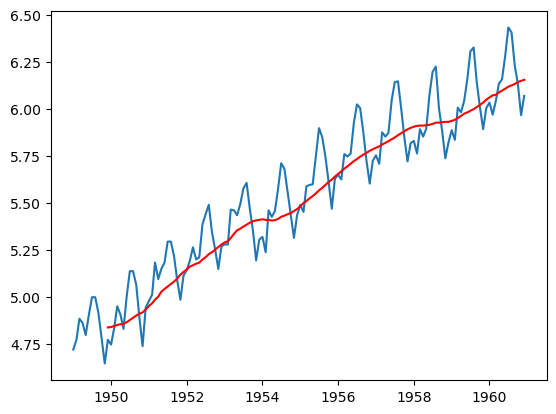

In [45]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [46]:
moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01    4.836178
1950-01-01    4.838381
1950-02-01    4.843848
1950-03-01    4.849344
Name: #Passengers, dtype: float64

In [47]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [48]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

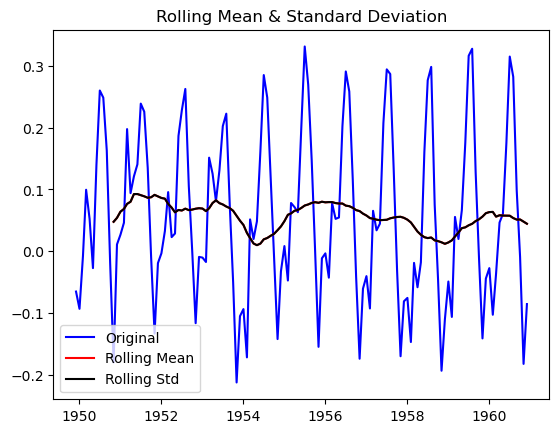

Results of Dickey-Fuller Test:
Test Statistic                 -3.162908
p-value                         0.022235
#lags used                     13.000000
Number of observation used    119.000000
Critical value (1%)            -3.486535
Critical value (5%)            -2.886151
Critical value (10%)           -2.579896
dtype: float64


In [49]:
test_stationarity(ts_log_moving_avg_diff)

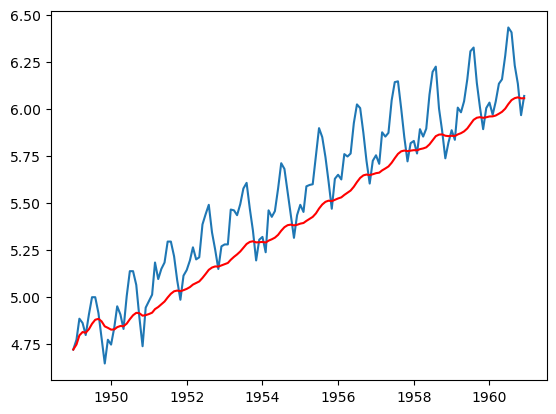

In [50]:
expwighted_avg=ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg,color='red')

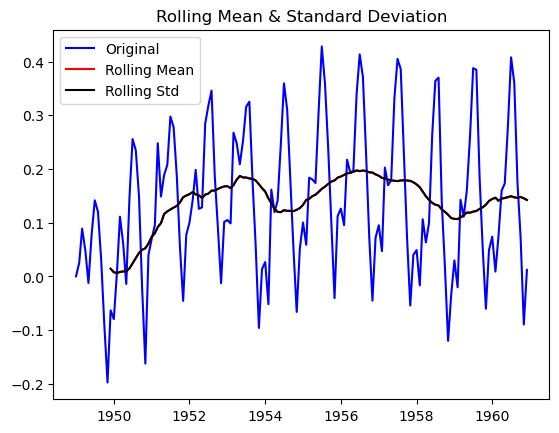

Results of Dickey-Fuller Test:
Test Statistic                 -3.601262
p-value                         0.005737
#lags used                     13.000000
Number of observation used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [51]:
ts_log_ewma_diff= ts_log-expwighted_avg
test_stationarity(ts_log_ewma_diff)

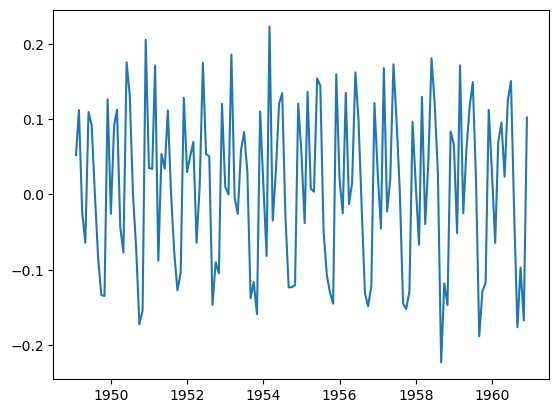

In [52]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

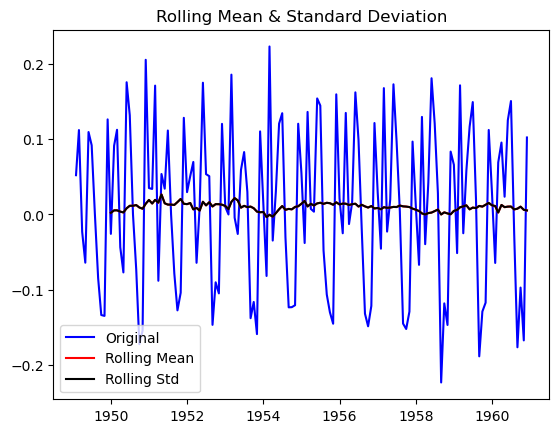

Results of Dickey-Fuller Test:
Test Statistic                 -2.717131
p-value                         0.071121
#lags used                     14.000000
Number of observation used    128.000000
Critical value (1%)            -3.482501
Critical value (5%)            -2.884398
Critical value (10%)           -2.578960
dtype: float64


In [53]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

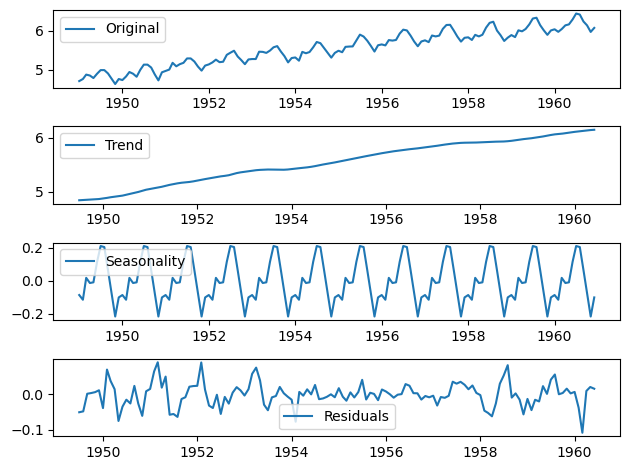

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

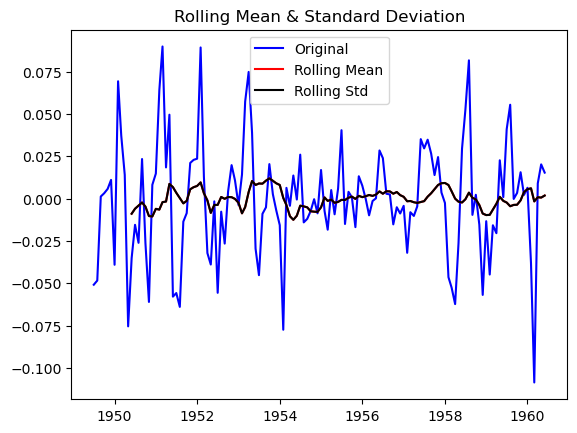

Results of Dickey-Fuller Test:
Test Statistic               -6.332387e+00
p-value                       2.885059e-08
#lags used                    9.000000e+00
Number of observation used    1.220000e+02
Critical value (1%)          -3.485122e+00
Critical value (5%)          -2.885538e+00
Critical value (10%)         -2.579569e+00
dtype: float64


In [55]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

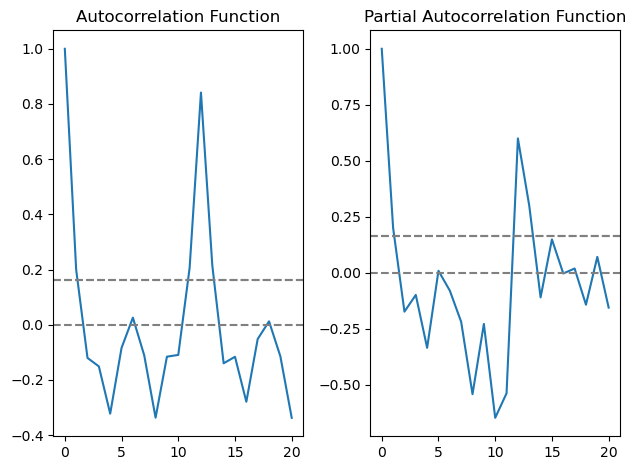

In [56]:
from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.title('Autocorrelation Function')

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='grey')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# AR MODEL

In [57]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'RSS: Month\n1949-01-01          NaN\n1949-02-01    49.358529\n1949-03-01    22.191195\n1949-04-01    25.001768\n1949-05-01    24.341366\n                ...    \n1960-08-01    42.066642\n1960-09-01    43.070768\n1960-10-01    39.678699\n1960-11-01    39.890733\n1960-12-01    34.195270\nLength: 144, dtype: float64')

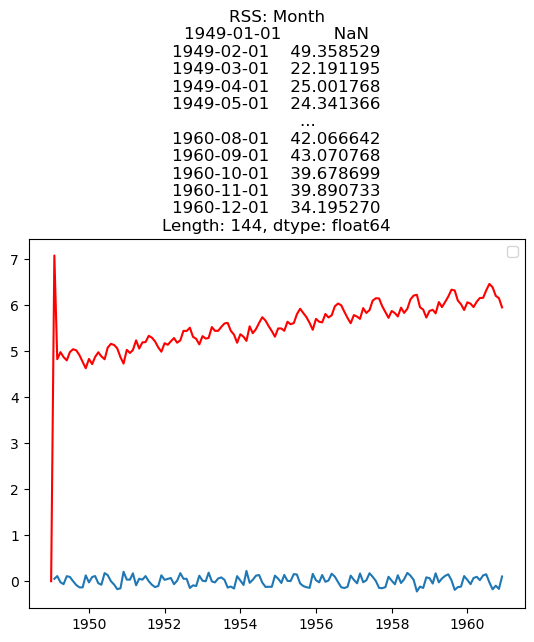

In [58]:
model= ARIMA(ts_log, order=(2, 2, 1))
results_AR = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.legend()
plt.title('RSS: '+str(((results_AR.fittedvalues-ts_log_diff)**2)))

In [59]:
((results_AR.fittedvalues-ts_log_diff)**2)

Month
1949-01-01          NaN
1949-02-01    49.358529
1949-03-01    22.191195
1949-04-01    25.001768
1949-05-01    24.341366
                ...    
1960-08-01    42.066642
1960-09-01    43.070768
1960-10-01    39.678699
1960-11-01    39.890733
1960-12-01    34.195270
Length: 144, dtype: float64

In [60]:
(results_AR.fittedvalues-ts_log_diff)**2

Month
1949-01-01          NaN
1949-02-01    49.358529
1949-03-01    22.191195
1949-04-01    25.001768
1949-05-01    24.341366
                ...    
1960-08-01    42.066642
1960-09-01    43.070768
1960-10-01    39.678699
1960-11-01    39.890733
1960-12-01    34.195270
Length: 144, dtype: float64

In [61]:
ts_log_diff

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: #Passengers, Length: 143, dtype: float64

In [62]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 119.036
Date:                Wed, 22 May 2024   AIC                           -230.072
Time:                        11:35:18   BIC                           -218.249
Sample:                    01-01-1949   HQIC                          -225.268
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2417      0.105      2.300      0.021       0.036       0.448
ar.L2         -0.1666      0.104     -1.600      0.110      -0.371       0.037
ma.L1         -1.0000     51.116     -0.020      0.984    -101.185      99.185
sigma2         0.0106      0.541      0.020      0.984      -1.049       1.070
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 6.73
Prob(Q):                              0.80   Prob(JB):                         0.03
Heteroskedasticity (H):               1.20   Skew:                             0.18
Prob(H) (two-sided):                  0.53   Kurtosis:                         2.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# MA MODEL

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: nan')

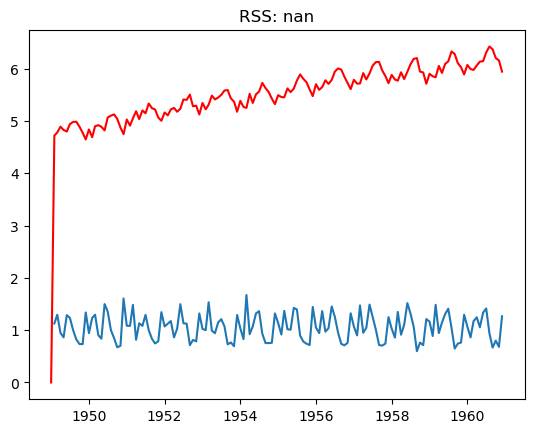

In [63]:
model = ARIMA(ts_log, order=(0, 1, 2))
results_MA = model.fit()
plt.plot(10**(ts_log_diff))
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: nan')

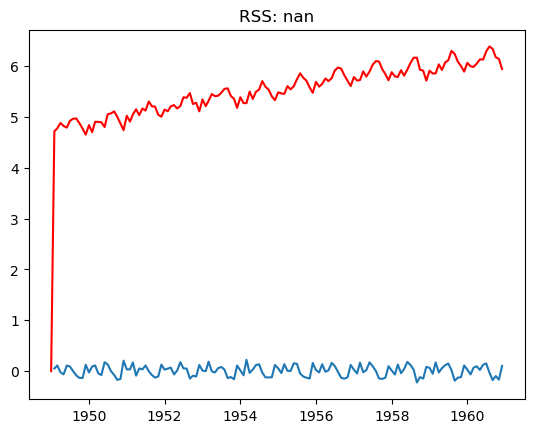

In [64]:
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum ((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [66]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883215
1949-05-01    4.824422
dtype: float64


In [67]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.494884
1949-04-01    14.378098
1949-05-01    19.202520
dtype: float64


In [87]:
predictions_ARIMA_log = pd.Series(ts_log, index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01     4.718499
1949-02-01     9.489184
1949-03-01    14.377685
1949-04-01    19.237911
1949-05-01    23.998311
dtype: float64

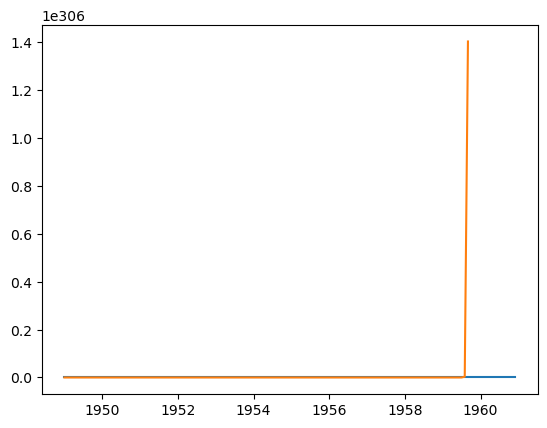

In [89]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)